# EAS 508 Statistical Data Mining Project

# Group 13

#### Members "Rohan Thorat - 50557738, Amulya Reddy Datla - 50560100, Chaitali Thakkar- 50557808, Jagruthi Reddy Ghanapat - 50560478"

##### The following data set was constructed from various data sources across the internet and merged.

Note : - Python was used for creating the dataset and basic EDA. Rest of the Statistical Model Training Was Done in R Studio.


In [1]:
import pandas as pd

# Load the data
minWageDf = pd.read_csv('datasets/MinimumWageData.csv', encoding='latin')

minWageDf.head()



,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.8,...,0.00000,0.00,0.00000,0.00,NaN
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.8,2.1,2.10000,15.61,2.10000,15.61,NaN
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.8,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.8,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.8,1.65(b),1.65000,12.26,1.65000,12.26,(b)


Some of the unclean data points which are unnessary for the target variable effective minimum wage were droped after carefull inspeciton.


In [2]:
# Drop the columns that are not needed
minWageDf = minWageDf.drop(['Footnote','Department.Of.Labor.Uncleaned.Data',
                            'Department.Of.Labor.Cleaned.Low.Value.2020.Dollars',
                            'Department.Of.Labor.Cleaned.High.Value.2020.Dollars',
                            'Department.Of.Labor.Cleaned.Low.Value',
                            'Department.Of.Labor.Cleaned.High.Value',
                            "Federal.Minimum.Wage.2020.Dollars",
                            "State.Minimum.Wage.2020.Dollars"], axis=1)

minWageDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 2862 non-null   int64  
 1   State                                2862 non-null   object 
 2   State.Minimum.Wage                   2862 non-null   float64
 3   Federal.Minimum.Wage                 2862 non-null   float64
 4   Effective.Minimum.Wage               2862 non-null   float64
 5   Effective.Minimum.Wage.2020.Dollars  2862 non-null   float64
 6   CPI.Average                          2862 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 156.6+ KB


Other Economical Data Was collected from various sources and merged based on year.


In [3]:
# Read all the datasets
fedFundsDf = pd.read_csv('datasets/FedFunds.csv', encoding='utf-8')
gdpDf = pd.read_csv('datasets/GDP.csv', encoding='utf-8')
homePriceIndexDf = pd.read_csv('datasets/HomePriceIndex.csv', encoding='utf-8')
mortgageeDf = pd.read_csv('datasets/Mortgage.csv', encoding='utf-8')
populationGrowthDf = pd.read_csv('datasets/Population-Growth.csv', encoding='utf-8')
unemploymentDf = pd.read_csv('datasets/Unemployment-Rate.csv', encoding='utf-8')

# List of dataframes
dfs = [fedFundsDf, gdpDf, homePriceIndexDf, mortgageeDf, populationGrowthDf, unemploymentDf]

### Here we Group the data by year and get the mean of the main data column so that we can have a single value for each year in our main Minimum Wage dataset.


In [4]:

meanDfs = []
for df in dfs:
    if "DATE" in df.columns:
        keyCol = df.columns[1]
        df["Year"] = pd.to_datetime(df["DATE"])     # Convert the date to datetime
        df["Year"] = df["Year"].dt.year             # Extract the year
        df["Year"] = df["Year"].astype(int)         # Convert the year to integer
        dfMean = df.groupby("Year")[keyCol].mean()  # Get the mean of the main data column by year
        dfMean = dfMean.to_frame().reset_index()    # Get the Data Frame with year and mean data of the year
        meanDfs.append(dfMean)


Merge the data frames with Join on Year column so each year we have single value for the above other economical data points.


In [5]:
# Merge the dataframes
mergedDf = minWageDf.copy()

for meanDf in meanDfs:
    mergedDf = pd.merge(mergedDf, meanDf, on="Year", how="left") # Merge the dataframes with the year as the key


Rename the column names to be clean and consistent.


### Cleanup column names by renaming them.


In [6]:
renameMap = {
    "FEDFUNDS" : "FedFundsRate",
    "CSUSHPISA" : "HomePriceIndex",
    "MORTGAGE30US" : "MortgageRate",
    "UNRATE" : "UnemploymentRate",
    "SPPOPGROWUSA" : "PopulationGrowth",
    "GDP" : "Gdp",
    "State.Minimum.Wage" : "StateMinimumWage",
    "Federal.Minimum.Wage" : "FederalMinimumWage",
    "Effective.Minimum.Wage" : "EffectiveMinimumWage",
    "CPI.Average" : "CPIAverage",
    "Effective.Minimum.Wage.2020.Dollars" : "EffectiveMinimumWage2020Dollars",
}
mergedDf = mergedDf.rename(columns=renameMap)
mergedDf.info()

# Save the data
# mergedDf.to_csv("FinalDataSet.csv", index=False)

mergedDf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2862 non-null   int64  
 1   State                            2862 non-null   object 
 2   StateMinimumWage                 2862 non-null   float64
 3   FederalMinimumWage               2862 non-null   float64
 4   EffectiveMinimumWage             2862 non-null   float64
 5   EffectiveMinimumWage2020Dollars  2862 non-null   float64
 6   CPIAverage                       2862 non-null   float64
 7   FedFundsRate                     2862 non-null   float64
 8   Gdp                              2862 non-null   float64
 9   HomePriceIndex                   1836 non-null   float64
 10  MortgageRate                     2700 non-null   float64
 11  PopulationGrowth                 2862 non-null   float64
 12  UnemploymentRate    

,Year,State,StateMinimumWage,FederalMinimumWage,EffectiveMinimumWage,EffectiveMinimumWage2020Dollars,CPIAverage,FedFundsRate,Gdp,HomePriceIndex,MortgageRate,PopulationGrowth,UnemploymentRate
0,1968,Alabama,0.00000,1.15,1.15,8.55,34.8,5.659167,940.6465,NaN,NaN,0.998461,3.558333
1,1968,Alaska,2.10000,1.15,2.10,15.61,34.8,5.659167,940.6465,NaN,NaN,0.998461,3.558333
2,1968,Arizona,0.46800,1.15,1.15,8.55,34.8,5.659167,940.6465,NaN,NaN,0.998461,3.558333
3,1968,Arkansas,0.15625,1.15,1.15,8.55,34.8,5.659167,940.6465,NaN,NaN,0.998461,3.558333
4,1968,California,1.65000,1.15,1.65,12.26,34.8,5.659167,940.6465,NaN,NaN,0.998461,3.558333


# Exploratory Data Analysis


   Year       State  StateMinimumWage  FederalMinimumWage  \
0  1968     Alabama           0.00000                1.15   
1  1968      Alaska           2.10000                1.15   
2  1968     Arizona           0.46800                1.15   
3  1968    Arkansas           0.15625                1.15   
4  1968  California           1.65000                1.15   

   EffectiveMinimumWage  EffectiveMinimumWage2020Dollars  CPIAverage  \
0                  1.15                             8.55        34.8   
1                  2.10                            15.61        34.8   
2                  1.15                             8.55        34.8   
3                  1.15                             8.55        34.8   
4                  1.65                            12.26        34.8   

   FedFundsRate       Gdp  HomePriceIndex  MortgageRate  PopulationGrowth  \
0      5.659167  940.6465             NaN           NaN          0.998461   
1      5.659167  940.6465             NaN     

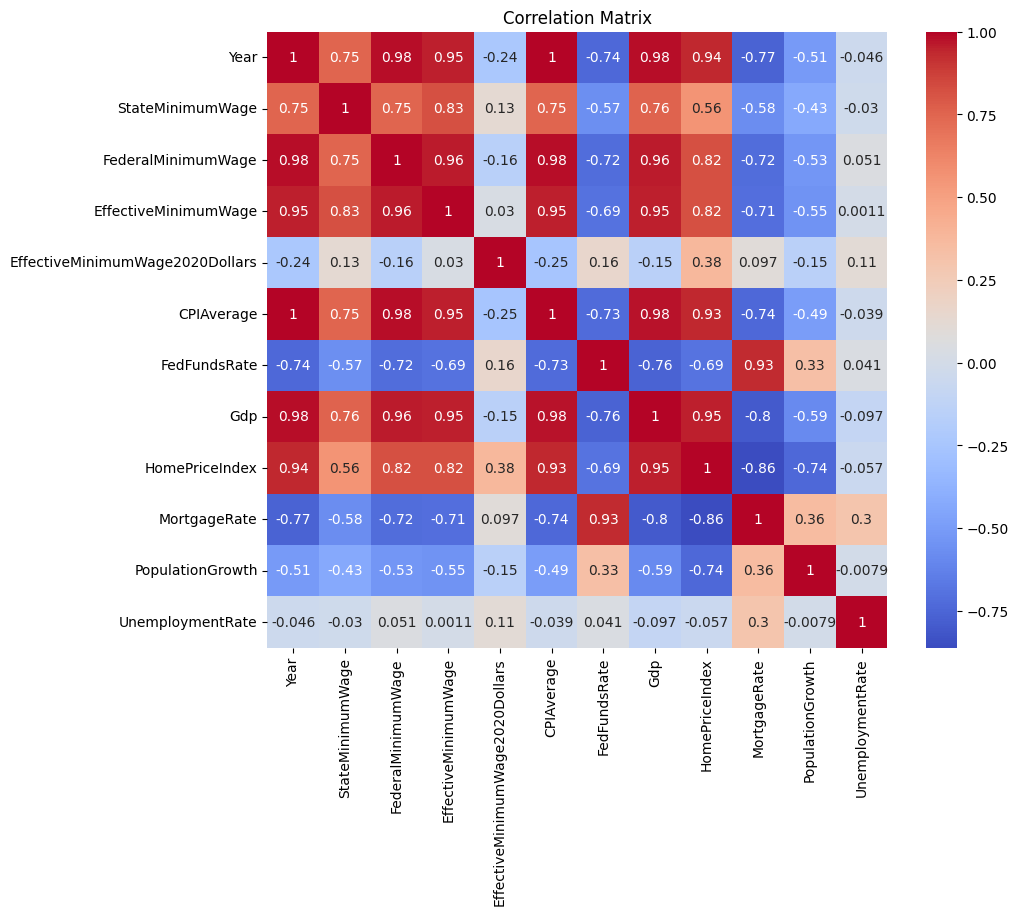

Highly correlated variables:
Year                  Year                    1.000000
                      CPIAverage              0.998557
                      FederalMinimumWage      0.982701
FederalMinimumWage    CPIAverage              0.982592
Gdp                   Year                    0.981545
                      CPIAverage              0.977198
FederalMinimumWage    Gdp                     0.963467
                      EffectiveMinimumWage    0.956504
Year                  EffectiveMinimumWage    0.953373
EffectiveMinimumWage  Gdp                     0.953157
Gdp                   HomePriceIndex          0.951578
CPIAverage            EffectiveMinimumWage    0.951096
Year                  HomePriceIndex          0.937696
CPIAverage            HomePriceIndex          0.934872
FedFundsRate          MortgageRate            0.931604
StateMinimumWage      EffectiveMinimumWage    0.825165
HomePriceIndex        EffectiveMinimumWage    0.823996
FederalMinimumWage    HomePriceIndex

In [13]:
import pandas as pd
# Importing the required libraries
import seaborn as sns
import matplotlib.pyplot as plt



# Load the dataset
df = pd.read_csv("FinalDataSet.csv")

# Perform EDA
# Summary statistics

# Label Encode State Column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# df['State'] = label_encoder.fit_transform(df['State'])

print(df.head())
summary_stats = df.describe()
print(summary_stats)

# Make Corr matrix without state column
dfNoState = df.drop("State", axis=1)

correlation_matrix = dfNoState.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Find highly correlated variables
highly_correlated = correlation_matrix[correlation_matrix > 0.8]
highly_correlated = highly_correlated.unstack().sort_values(ascending=False).drop_duplicates()
print("Highly correlated variables:")
print(highly_correlated)

### Distribution of Effective Minimum Wage


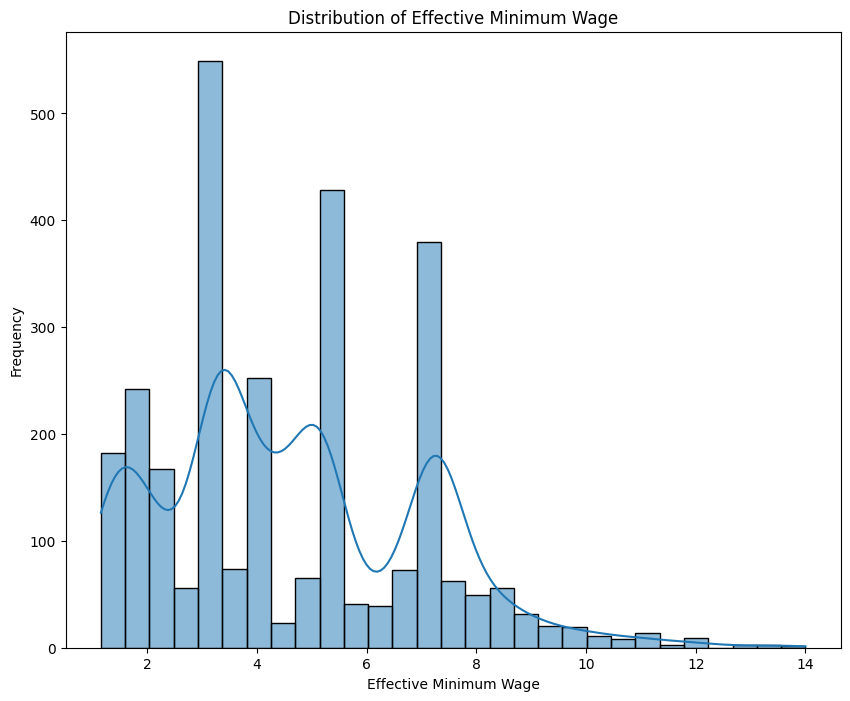

In [14]:
plt.figure(figsize=(10, 8))
sns.histplot(df['EffectiveMinimumWage'], kde=True)
plt.title('Distribution of Effective Minimum Wage')
plt.xlabel('Effective Minimum Wage')
plt.ylabel('Frequency')
plt.show()

### Plot of the average effective minimum wage for states with the highest and lowest average effective minimum wage.


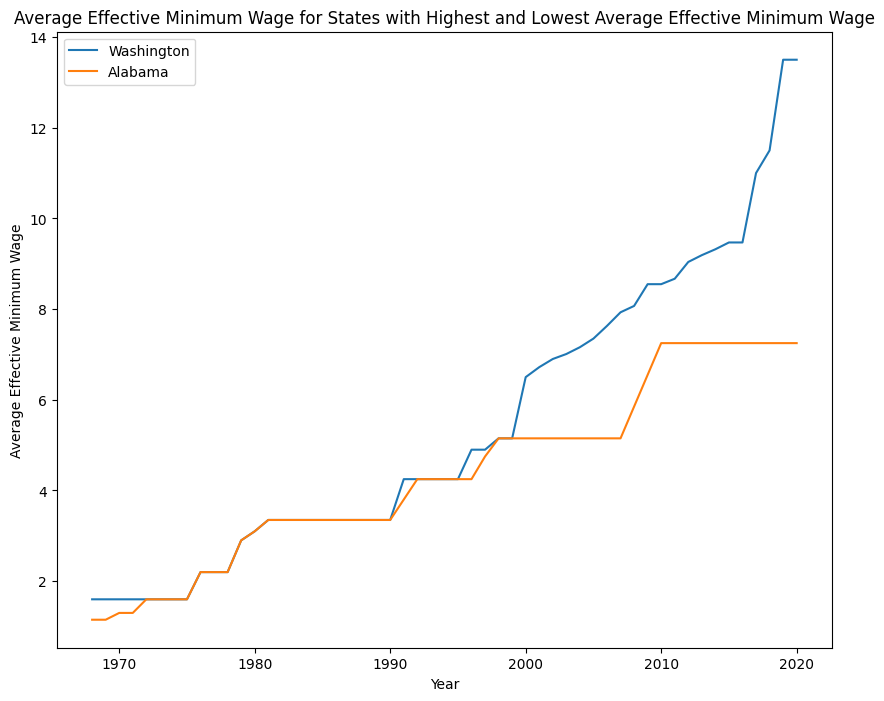

State with highest average effective minimum wage: Washington
State with lowest average effective minimum wage: Alabama


<Figure size 640x480 with 0 Axes>

In [15]:
# Group data set by state and year and make a plot of the average effective minimum wage for states with the highest and lowest average effective minimum wage.
grouped = df.groupby(['State', 'Year']).mean()
grouped = grouped.reset_index()

# Find states with highest and lowest average effective minimum wage
highest_avg_wage = grouped.groupby('State')['EffectiveMinimumWage'].mean().idxmax()
lowest_avg_wage = grouped.groupby('State')['EffectiveMinimumWage'].mean().idxmin()

# Filter data for states with highest and lowest average effective minimum wage
highest_avg_wage_data = grouped[grouped['State'] == highest_avg_wage]
lowest_avg_wage_data = grouped[grouped['State'] == lowest_avg_wage]

# Plot the average effective minimum wage for states with top 5 highest and 5 lowest average effective minimum wage
plt.figure(figsize=(10, 8))
sns.lineplot(x='Year', y='EffectiveMinimumWage', data=highest_avg_wage_data, label=highest_avg_wage)
sns.lineplot(x='Year', y='EffectiveMinimumWage', data=lowest_avg_wage_data, label=lowest_avg_wage)
plt.xlabel('Year')
plt.ylabel('Average Effective Minimum Wage')
plt.title('Average Effective Minimum Wage for States with Highest and Lowest Average Effective Minimum Wage')
plt.legend()
plt.show()

# save the plot
plt.savefig('highest_lowest_avg_wage_plot.png')


# List the states with the highest and lowest average effective minimum wage
print("State with highest average effective minimum wage:", highest_avg_wage)
print("State with lowest average effective minimum wage:", lowest_avg_wage)



### Analyze how changes in the FedFundsRate influence UnemploymentRate and GDP.


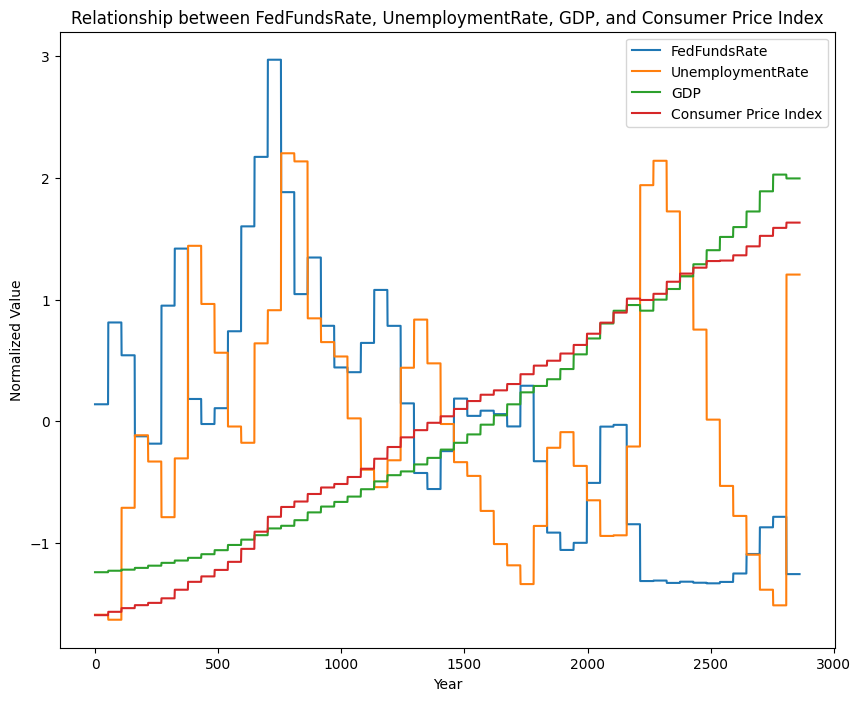

In [17]:

normalized_df = (df.drop(['State', 'Year'], axis=1) - df.drop(['State', 'Year'], axis=1).mean()) / df.drop(['State', 'Year'], axis=1).std()

plt.figure(figsize=(10, 8))
plt.plot(normalized_df['FedFundsRate'], label='FedFundsRate')
plt.plot(normalized_df['UnemploymentRate'], label='UnemploymentRate')
plt.plot(normalized_df['Gdp'], label='GDP')
plt.plot(normalized_df['CPIAverage'], label='Consumer Price Index')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.title('Relationship between FedFundsRate, UnemploymentRate, GDP, and Consumer Price Index')
plt.legend()
plt.show()

### Plot the relation between Housing Price Index Mortgage Rate, Population Growth and Effective Minimum Wage


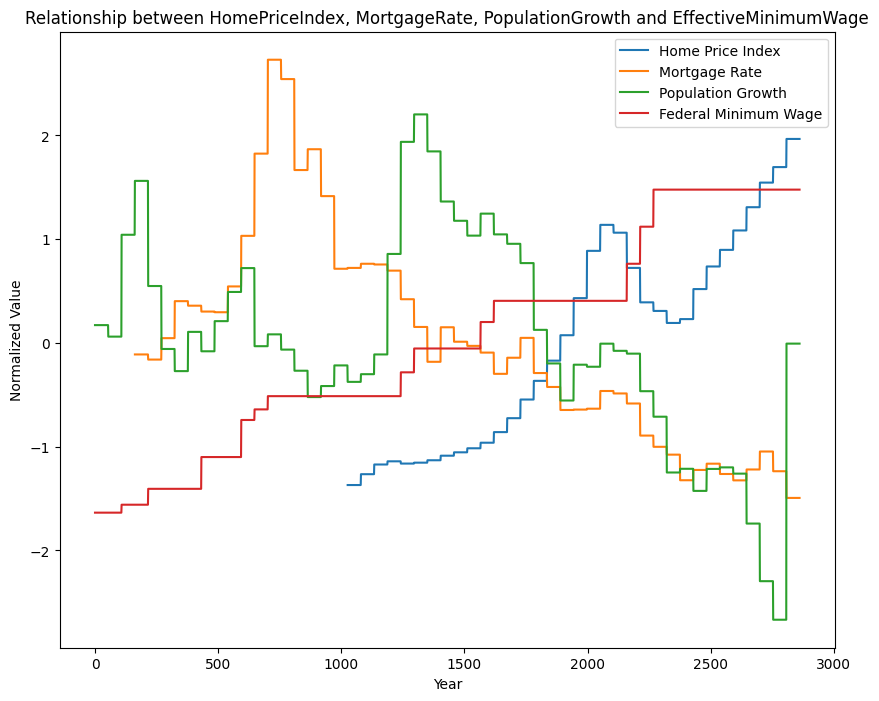

In [12]:
# Normalize the data without the 'State' and 'Year' columns
normalized_df = (df.drop(['State', 'Year'], axis=1) - df.drop(['State', 'Year'], axis=1).mean()) / df.drop(['State', 'Year'], axis=1).std()

plt.figure(figsize=(10, 8))
plt.plot(normalized_df['HomePriceIndex'], label='Home Price Index')
plt.plot(normalized_df['MortgageRate'], label='Mortgage Rate')
plt.plot(normalized_df['PopulationGrowth'], label='Population Growth')
plt.plot(normalized_df['FederalMinimumWage'], label='Federal Minimum Wage')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.title('Relationship between HomePriceIndex, MortgageRate, PopulationGrowth and EffectiveMinimumWage')  
plt.legend()
plt.show()
